In [5]:
pip install mplfinance

     ---------------------------------------- 73.1/73.1 kB 3.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import datetime

In [10]:
ticker = input("Type in the stock ticker")
start_date = input("Type in a start date (Ex.: 2010-01-01)")

end_date = datetime.today().strftime('%Y-%m-%d')

data_downloaded = yf.download(ticker, start=start_date, end=end_date)

data = data_downloaded

Type in the stock tickerAAPL
Type in a start date (Ex.: 2010-01-01)2023-01-01
[*********************100%***********************]  1 of 1 completed


In [11]:
data["Returns"] = round((data["Adj Close"].pct_change())*100,2)

# Log returns often exhibit a more symmetric and approximately normal distribution compared to regular returns
# Log returns tend to be stationary, meaning their statistical properties, such as mean and variance, remain relatively constant over time. Stationarity is a fundamental assumption in many financial models and time series analysis methods.
# stationary: statistical properties, such as the mean, variance, and autocorrelation, remain constant over time

data["Log_Returns"] = round((np.log(data["Adj Close"]) - np.log(data["Adj Close"].shift(1)))*100,2)
window_size = 30
data['Historical_Volatility'] = round(data["Log_Returns"].rolling(window=window_size).std() * np.sqrt(252),2)

data['EMA8'] = round(data['Close'].ewm(span=9, adjust=False).mean(),2)
data['EMA21'] = round(data['Close'].ewm(span=21, adjust=False).mean(),2)
data['EMA50'] = round(data['Close'].ewm(span=50, adjust=False).mean(),2)
data['EMA72'] = round(data['Close'].ewm(span=72, adjust=False).mean(),2)
data['EMA144'] = round(data['Close'].ewm(span=144, adjust=False).mean(),2)
data['EMA200'] = round(data['Close'].ewm(span=200, adjust=False).mean(),2)

delta = data['Close'].diff()
gain = delta.mask(delta<0,0)
loss = -delta.mask(delta>0,0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
rsi = 100 - (100 / (1 + rs))
data['RSI'] = round(rsi,2)

# Calculate Bollinger Bands (BB) for 20-day simple moving average and 2 standard deviations
data['SMA20'] = data['Close'].rolling(window=20).mean()
data['StdDev'] = round(data['Close'].rolling(window=20).std(),2)
data['UpperBB'] = round(data['SMA20'] + (data['StdDev'] * 2),2)
data['LowerBB'] = round(data['SMA20'] - (data['StdDev'] * 2),2)

data= pd.DataFrame(data)
data=data.dropna()
data

,Open,High,Low,Close,Adj Close,Volume,Returns,Log_Returns,Historical_Volatility,EMA8,EMA21,EMA50,EMA72,EMA144,EMA200,RSI,SMA20,StdDev,UpperBB,LowerBB
Date,,,,,,,,,,,,,,,,,,,,
2023-02-15,153.110001,155.500000,152.880005,155.330002,155.115448,65573800,1.39,1.38,23.06,152.04,147.07,139.07,135.90,131.25,129.69,67.97,147.456499,6.05,159.56,135.36
2023-02-16,153.509995,156.330002,153.350006,153.710007,153.497696,68167900,-1.04,-1.05,23.60,152.38,147.68,139.65,136.39,131.56,129.93,62.44,148.378499,5.47,159.32,137.44
2023-02-17,152.350006,153.000000,150.850006,152.550003,152.339294,59144100,-0.75,-0.76,23.42,152.41,148.12,140.15,136.83,131.85,130.15,66.18,149.112499,4.95,159.01,139.21
2023-02-21,150.199997,151.300003,148.410004,148.479996,148.274902,58867200,-2.67,-2.70,23.67,151.62,148.15,140.48,137.15,132.07,130.34,56.49,149.480999,4.58,158.64,140.32
2023-02-22,148.869995,149.949997,147.160004,148.910004,148.704315,51011300,0.29,0.29,23.68,151.08,148.22,140.81,137.48,132.31,130.52,55.51,149.799999,4.29,158.38,141.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-12,181.270004,183.889999,180.970001,183.789993,183.789993,54274900,1.56,1.55,18.67,179.84,176.83,170.68,166.34,155.43,149.93,72.59,176.529002,3.73,183.99,169.07
2023-06-13,182.800003,184.149994,182.440002,183.309998,183.309998,54929100,-0.26,-0.26,18.71,180.53,177.42,171.18,166.81,155.81,150.27,80.81,177.091001,3.87,184.83,169.35
2023-06-14,183.369995,184.389999,182.020004,183.949997,183.949997,57462900,0.35,0.35,18.52,181.22,178.01,171.68,167.28,156.20,150.60,81.16,177.685001,3.97,185.63,169.75


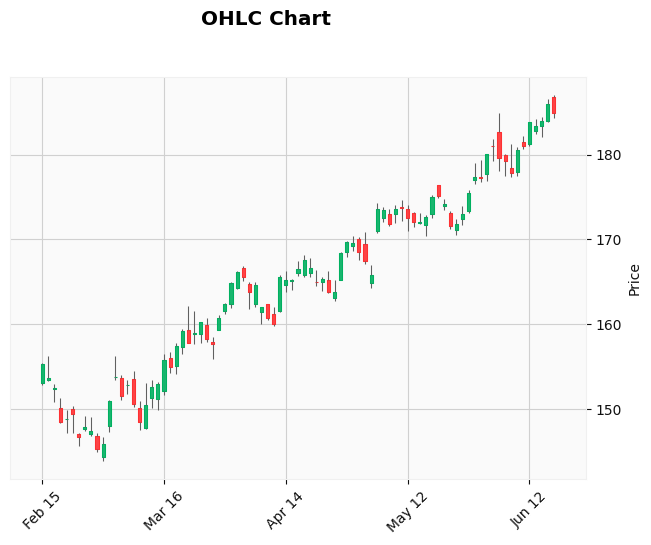

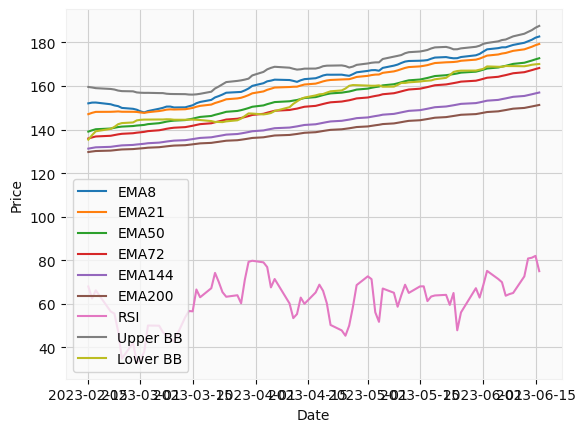

In [12]:
import matplotlib.pyplot as plt
import mplfinance as mpf

# Plot OHLC chart
mpf.plot(data, type='candle', style='yahoo', title='OHLC Chart', ylabel='Price')

# Plot EMA indicators
plt.plot(data.index, data['EMA8'], label='EMA8')
plt.plot(data.index, data['EMA21'], label='EMA21')
plt.plot(data.index, data['EMA50'], label='EMA50')
plt.plot(data.index, data['EMA72'], label='EMA72')
plt.plot(data.index, data['EMA144'], label='EMA144')
plt.plot(data.index, data['EMA200'], label='EMA200')

# Plot RSI indicator
plt.plot(data.index, data['RSI'], label='RSI')

# Plot Bollinger Bands
plt.plot(data.index, data['UpperBB'], label='Upper BB')
plt.plot(data.index, data['LowerBB'], label='Lower BB')

# Customize the plot
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)

# Show the plot
plt.show()

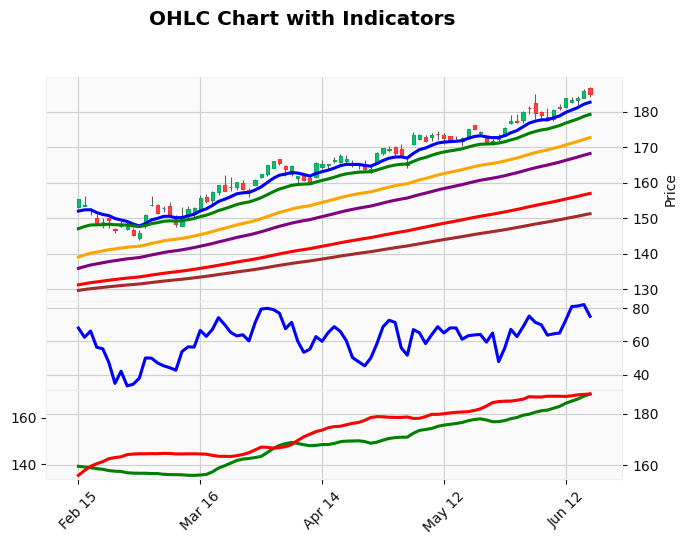

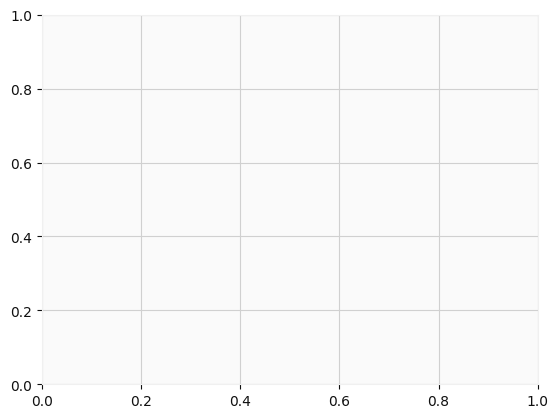

In [15]:
import matplotlib.pyplot as plt
import mplfinance as mpf

# Create a copy of the data with just OHLC columns for mplfinance
ohlc_data = data[['Open', 'High', 'Low', 'Close']]

# Plot OHLC chart with indicators
mpf.plot(ohlc_data, type='candle', style='yahoo', title='OHLC Chart with Indicators', ylabel='Price',
         addplot=[
             mpf.make_addplot(data['EMA8'], color='blue'),
             mpf.make_addplot(data['EMA21'], color='green'),
             mpf.make_addplot(data['EMA50'], color='orange'),
             mpf.make_addplot(data['EMA72'], color='purple'),
             mpf.make_addplot(data['EMA144'], color='red'),
             mpf.make_addplot(data['EMA200'], color='brown'),
             mpf.make_addplot(data['RSI'], panel=1, color='blue'),
             mpf.make_addplot(data['UpperBB'], panel=2, color='green'),
             mpf.make_addplot(data['LowerBB'], panel=2, color='red')
         ])

# Customize the plot
plt.grid(True)

# Show the plot
#plt.show()
